In [22]:
import pandas as pd

In [24]:
from google.colab import files
uploaded = files.upload()

Saving blogs_categories.csv to blogs_categories (1).csv


In [25]:
df = pd.read_csv("blogs_categories.csv")
df.head(2)

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [26]:
## so first i am doing data transformation categorical to numerical
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
df.shape

(19997, 3)

In [29]:
print(df.columns)

Index(['Unnamed: 0', 'Data', 'Labels'], dtype='object')


In [30]:
df['Data'] = le.fit_transform(df['Data'])

In [31]:
df['Labels'] = le.fit_transform(df['Labels'])

In [32]:
df.head(2)

,Unnamed: 0,Data,Labels
0,0,14012,0
1,1,14013,0


In [33]:
## Univariate Analysis
# Calculate summary statistics
mean = df['Labels'].mean()
median = df['Labels'].median()
std_dev = df['Labels'].std()

# Create frequency table
frequency_table = df['Labels'].value_counts()

print('mean:',mean)
print("median:",median)
print("standrad dev:",std_dev)
print(frequency_table)

mean: 9.499174876231434
median: 9.0
standrad dev: 5.766464449012171
Labels
0     1000
1     1000
18    1000
17    1000
16    1000
14    1000
13    1000
12    1000
11    1000
10    1000
9     1000
8     1000
7     1000
6     1000
5     1000
4     1000
3     1000
2     1000
19    1000
15     997
Name: count, dtype: int64


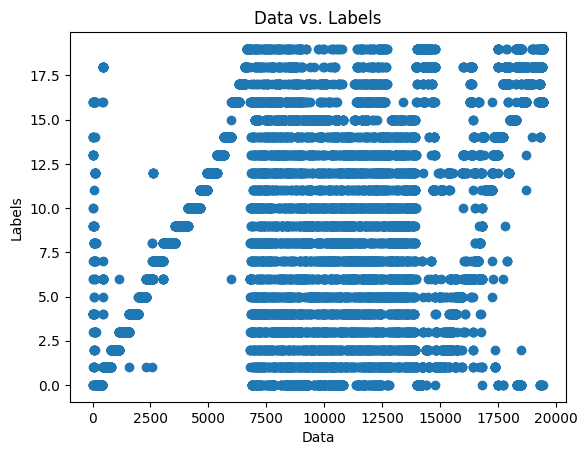

In [34]:
## Bivariate Analysis
import pandas as pd
import matplotlib.pyplot as plt

# Create scatterplot of age vs hours per week
plt.scatter(df.Data, df.Labels)
plt.title('Data vs. Labels')
plt.xlabel('Data')
plt.ylabel('Labels')
plt.show()

In [35]:
df.head(2)

,Unnamed: 0,Data,Labels
0,0,14012,0
1,1,14013,0


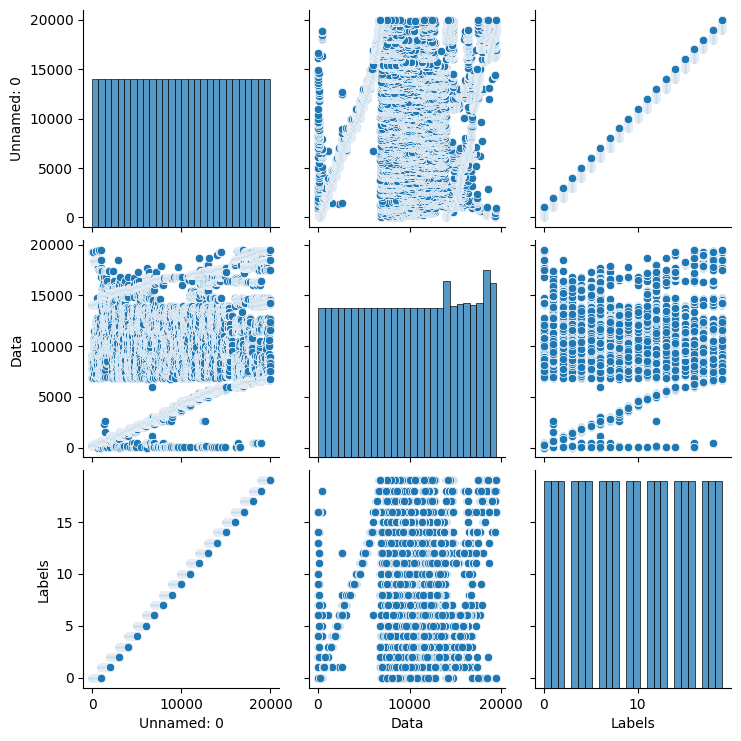

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)
plt.show()

In [37]:
## multivariate analysis
import pandas as pd
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)

# Create DataFrame with principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

In [39]:
y = df['Labels']

In [40]:
x = df.iloc[:,:-1]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30)

In [43]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [44]:
## fit the model
mnb.fit(x_train,y_train)

MultinomialNB()

In [45]:
## model predicted values
y_pred_train = mnb.predict(x_train)
y_pred_test = mnb.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
ac1 = accuracy_score(y_train,y_pred_train)
ac2 = accuracy_score(y_test,y_pred_test)

In [48]:
print("training accuracy score:", ac1.round(2))
print("test accuracy score:", ac2.round(2))

training accuracy score: 0.12
test accuracy score: 0.13
